# Exercise time:

Do these exercises to `mtcars`-dataset intialized below (do note the use of `rownames_to_column` that will store row names from `data.frame` into a column in `tibble` [[rownames_to_column]](https://tibble.tidyverse.org/reference/rownames.html)):

1. Use `mutate` to calculate litres per 100 km (e.g. lp100km) as mpg is a bad unit to use for fuel consumption (Ref: [[1]](http://science.sciencemag.org/content/320/5883/1593.full?ijkey=3pScQm7pQBzqs&keytype=ref&siteid=sci). Conversion factor is `lp100km=235.214583/mpg`.
2. Calculate correlation of horsepower and quarter mile time (`qsec`). Plot scatter plot and a linear fit.
3. Group data based on cylinder numbers. Calculate correlation between weight and l/100km for each group. Plot scatter plots with different colours for each group.

# Solutions:

In [1]:
library(tidyverse)

data(mtcars)

mtcars_tbl <- as_tibble(rownames_to_column(mtcars,var='model'))

str(mtcars_tbl)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.0     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	32 obs. of  12 variables:
 $ model: chr  "Mazda RX4" "Mazda RX4 Wag" "Datsun 710" "Hornet 4 Drive" ...
 $ mpg  : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl  : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp : num  160 160 108 258 360 ...
 $ hp   : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat : num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt   : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec : num  16.5 17 18.6 19.4 17 ...
 $ vs   : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am   : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear : num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb : num  4 4 1 1 2 1 4 2 2 4 ...


## 1.

In [2]:
mtcars_tbl <- mtcars_tbl %>%
    mutate(lp100km=235.214583/mpg)

str(mtcars_tbl)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	32 obs. of  13 variables:
 $ model  : chr  "Mazda RX4" "Mazda RX4 Wag" "Datsun 710" "Hornet 4 Drive" ...
 $ mpg    : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl    : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp   : num  160 160 108 258 360 ...
 $ hp     : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat   : num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt     : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec   : num  16.5 17 18.6 19.4 17 ...
 $ vs     : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am     : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear   : num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb   : num  4 4 1 1 2 1 4 2 2 4 ...
 $ lp100km: num  11.2 11.2 10.3 11 12.6 ...


## 2.

hp_qsec_cor
<dbl>
-0.7082234


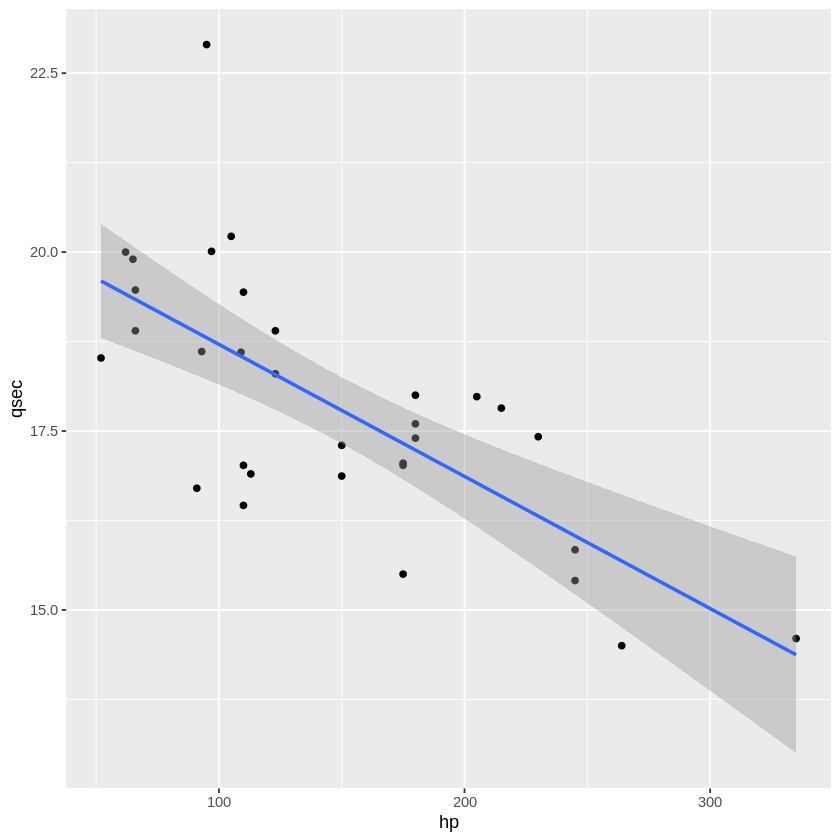

In [3]:
mtcars_tbl %>%
    summarize(hp_qsec_cor=cor(hp,qsec))

mtcars_tbl %>%
    ggplot(aes(x=hp,y=qsec)) +
    geom_point() +
    geom_smooth(method=lm)

## 3.

cyl,wt_lp100km_cor
<dbl>,<dbl>
4,0.7215298
6,0.6926004
8,0.7160829


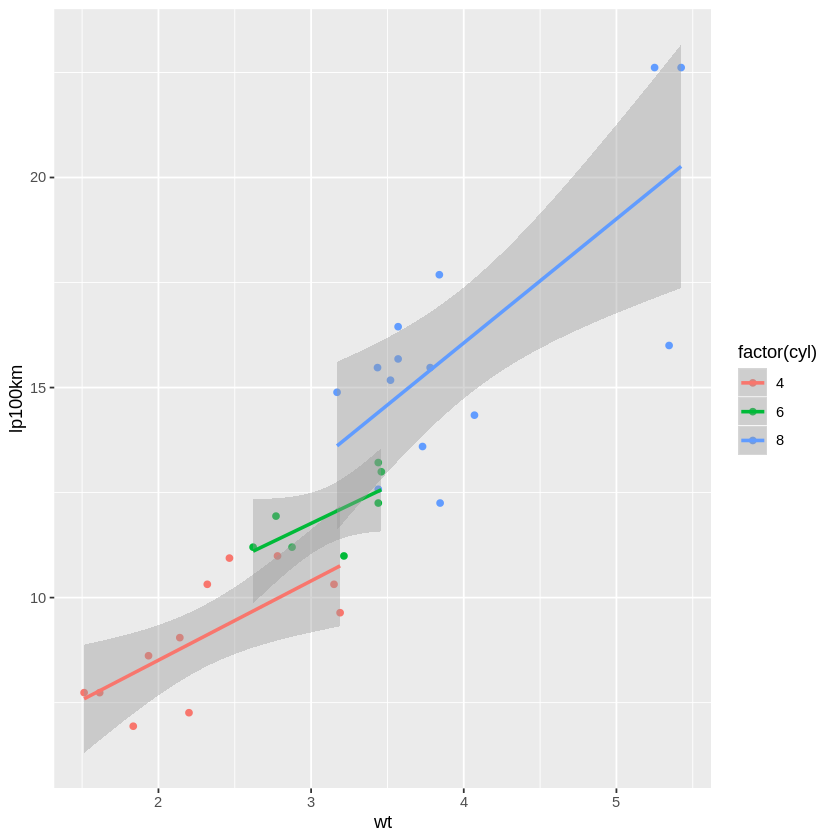

In [4]:
mtcars_grouped_by_cyl <- mtcars_tbl %>%
    group_by(cyl)

mtcars_grouped_by_cyl %>%
    summarize(wt_lp100km_cor=cor(wt,lp100km))

mtcars_grouped_by_cyl %>%
    ggplot(aes(x=wt,y=lp100km,color=factor(cyl))) +
    geom_point() +
    geom_smooth(method=lm)